In [1]:
# Step 1: Introduction to CIFAR-10 Dataset
import numpy as np
from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

C:\Users\mpgun\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
# Describe the dataset
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)
print("Number of classes:", len(np.unique(y_train)))

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 10


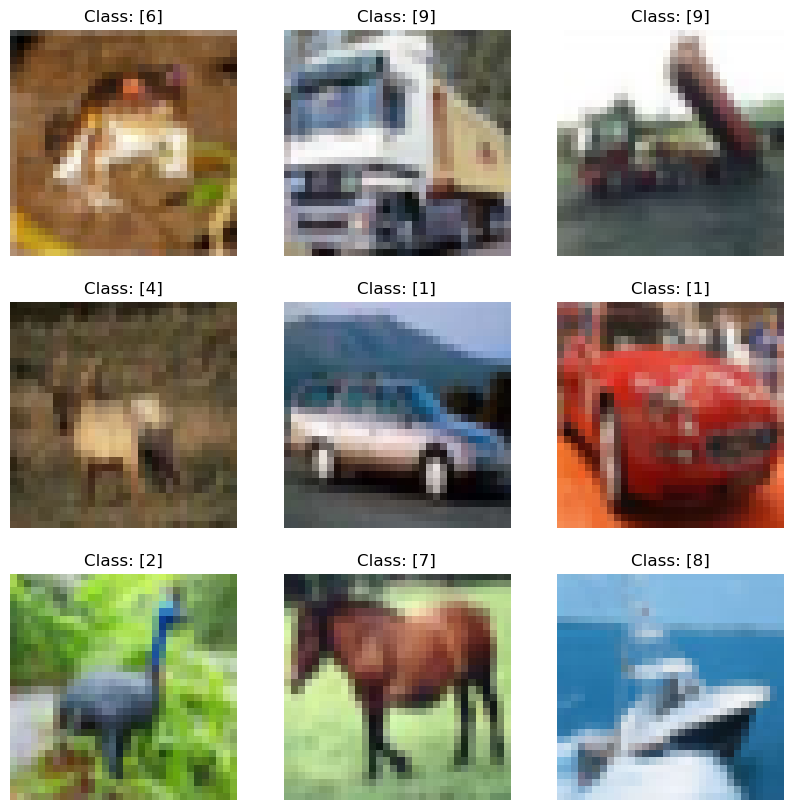

In [3]:
# Step 2: Data Preprocessing
import matplotlib.pyplot as plt

# Visualize and display images from the dataset
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.axis('off')
    ax.set_title("Class: {}".format(y_train[i]))
plt.show()

# Normalize the image pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices (one-hot encoding)
from keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [4]:

# Step 3: Building the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation

# Construct a neural network using the Sequential model
model = Sequential()

# Add layers
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


/Users/Premi/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:

# Step 4: Compiling the Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [6]:
# Step 5: Training the Model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2597 - loss: 2.0612 - val_accuracy: 0.3612 - val_loss: 1.7983
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3781 - loss: 1.7464 - val_accuracy: 0.3947 - val_loss: 1.6987
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4072 - loss: 1.6583 - val_accuracy: 0.4189 - val_loss: 1.6561
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4271 - loss: 1.6016 - val_accuracy: 0.4243 - val_loss: 1.6152
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4529 - loss: 1.5321 - val_accuracy: 0.4418 - val_loss: 1.5706
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4613 - loss: 1.5098 - val_accuracy: 0.4532 - val_loss: 1.5491
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4717 - loss: 1.4747 - val_accuracy: 0.4577 - val_loss: 1.5324
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4833 - loss: 1.4546 - val_accuracy: 0.

In [7]:
# Step 6: Evaluating the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.4850 - loss: 1.4653
Test Loss: 1.4620020389556885
Test Accuracy: 0.48829999566078186


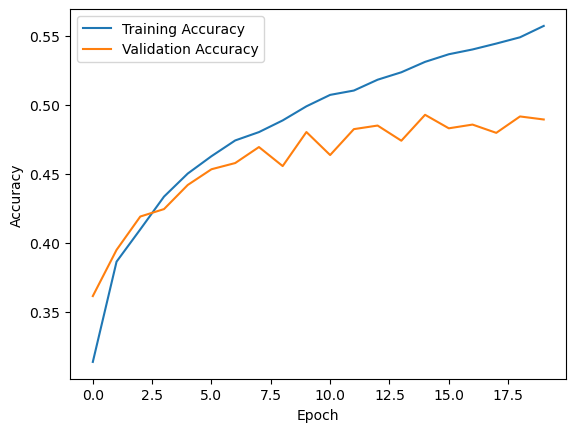

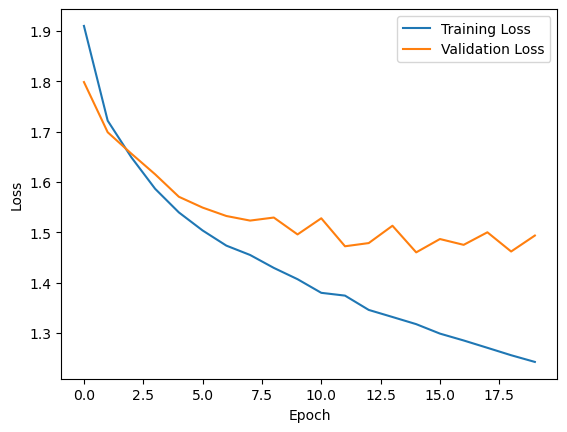

In [8]:
# Step 7: Visualization of Training Progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
# Step 8: Making Predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step


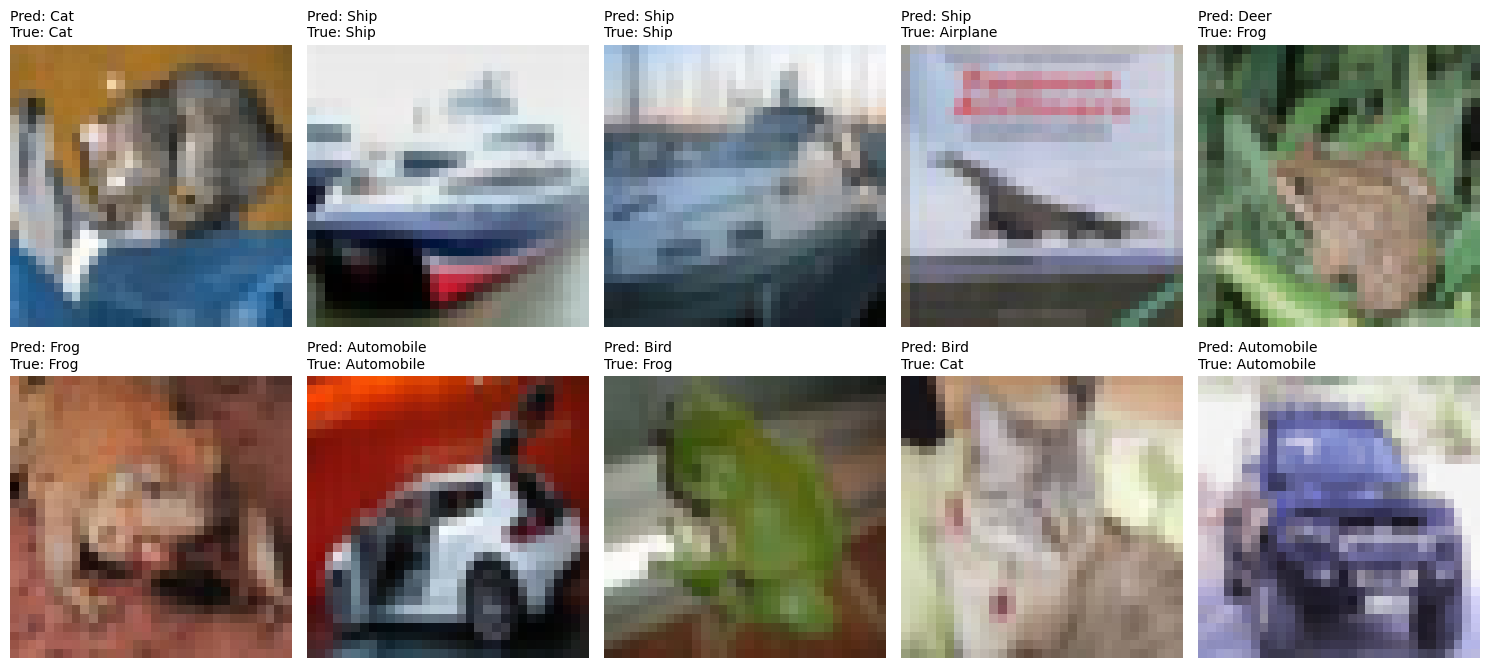

In [10]:
# Step 9: Conclusion
# Summarize key learnings and discuss potential improvements and real-world applicability of the model.

# Define function to plot images with predictions
def plot_images(images, predicted_categories, true_categories):
    import matplotlib.pyplot as plt

    class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                   'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

    fig, axes = plt.subplots(2, 5, figsize=(15, 7))
    for i, ax in enumerate(axes.flat):
        pred_label = class_names[predicted_categories[i]]
        true_label = class_names[true_categories[i]]
        ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}", loc='left', fontsize=10)
        ax.imshow(images[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Use the function to plot images
plot_images(x_test[:10], predicted_classes[:10], np.argmax(y_test[:10], axis=1))
